In [1]:
import pandas as pd
import numpy as np

In [2]:
import pylab as pl
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [3]:
!pip install geopandas

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621


In [4]:
import geopandas as gpd

In [5]:
df_ = pd.read_csv("SCcontactDBmodifiedFBBAugust2020.csv")#contactdbexport.csv")#"SC-List.csv")

In [6]:
tmp = df_.merge(pd.read_csv("descmembers - Sheet1.csv"), 
                on=["First Name","Last Name"], how="inner")

tmp["state"] = [tmp.state_desc.values[i] if isinstance(tmp.state_desc.values[i], str) 
 else tmp.state.values[i] for i in range(len(tmp)) ]
tmp["Email"] = [tmp.email.values[i] if isinstance(tmp.email.values[i], str) 
 else tmp.Email.values[i] for i in range(len(tmp)) ]
df_ = df_.merge(tmp[["First Name","Last Name","state", "Email"]], 
         on=["First Name","Last Name"], how="outer")


In [7]:
df_["Email"] =   [df_.Email_x.values[i] if isinstance(df_.Email_x.values[i], str) 
 else df_.Email_y.values[i] for i in range(len(df_)) ]
df_["state"] =   [df_.state_x.values[i] if isinstance(df_.state_x.values[i], str) 
 else df_.state_y.values[i] for i in range(len(df_)) ]
df_ = df_.drop(["Email_x", "Email_y", "state_x", "state_y"], axis=1)
#.drop_duplicates(subset=["Email"],  keep='first')

In [8]:
for em in df_.drop_duplicates(subset="Email").Email.values:
    if em.strip().split(".")[-1] in ["com", "net", "mil", "org"]:
        print(df_[df_.Email==em].values[0])

['LCOGT/UCSB' 'Iair' 'Arcavi' 'Transients and Variable Stars'
 'arcavi@gmail.com' 'LCOGT/UCSB']
['Las Cumbres Observatory' 'Etienne' 'Bachelet'
 'Transients and Variable Stars' 'etibachelet@gmail.com'
 'Las Cumbres Observatory']
[nan 'Andrew' 'Becker' 'Transients and Variable Stars'
 'acbecker@gmail.com' nan]
['Stockholm University/Oskar Klein Centre' 'Rahul' 'Biswas'
 'Transients and Variable Stars' 'rbiswas4@gmail.com'
 'Stockholm University/Oskar Klein Centre']
[nan 'Todd' 'Boroson' 'Solar System' 'tboroson@lcogt.net' nan]
['Pennsylvania State University' 'Niel' 'Brandt'
 'Transients and Variable Stars' 'wnbrandt@gmail.com'
 'Pennsylvania State University']
[nan 'Tim' 'Brown' 'AGN' 'tbrown@lcogt.net' nan]
['Istituto Nazionale di Astrofisica (INAF)' 'Stefano' 'Cavuoti'
 'Transients and Variable Stars' 'stefano.cavuoti@gmail.com'
 'Istituto Nazionale di Astrofisica (INAF)']
['Northwestern University' 'Deanne' 'Coppejans'
 'Transients and Variable Stars' 'deanne.coppejans@gmail.com'
 '

In [9]:
df_[df_["First Name"] == "Hiranya"]

,Company,First Name,Last Name,SC,Email,state
1273,NaN,Hiranya,Peiris,DESC,h.peiris@ucl.ac.uk,NaN


In [10]:
countries = {"shporeravi@gmail.com":"US",
             'tarun.k.ruchandani@gmail.com':"oth",
             'mustaric@gmail.com':"US",
             'mohammad@akhlaghi.org':"ES",
            'tanguita@gmail.com':"CL",
            'arcavi@gmail.com':"IS",'eric@aubourg.net':"FR", 'kbechtol@lsst.org':"US",
            'rbiswas4@gmail.com':"SW", 'michael.blanton@gmail.com':"US",
           'rblum@lsst.org':"US",
             'bochanski@gmail.com':"US",
'bolin.astro@gmail.com':"oth",
'kirk.borne@gmail.com':"oth",
'tboroson@lcogt.net':"US",
'sarah@sarahbridle.net':"US",
'tbrown@lcogt.net':"US",
'philbull@gmail.com':"oth",
'burninghamster@gmail.com':"oth",
'JCarlin@lsst.org':"US",
'paolo.cassata@gmail.com':"oth",
'stefano.cavuoti@gmail.com':"oth",
'claudiacicone@gmail.com':"oth",
'cclaver@lsst.org':"US",
'conselice@gmail.com':"oth",
'deanne.coppejans@gmail.com':"US",
'michael.w.coughlin@gmail.com':"oth",
'mcuk@seti.org':"US",
'scottvalscott@gmail.com':"oth",
'will@dawsonresearch.com':"US",
'demetradecicco@gmail.com':"oth",
'vpdebattista@gmail.com':"oth",
'jadexter@gmail.com':"oth",
'dhitals@me.com':"oth",
'aaron.dotter@gmail.com':"US",
'siegfried.eggl@gmail.com':"oth",
'timeifler@gmail.com':"oth",
'rossfadely@gmail.com':"US",
'finch@usno.navy.mil':"US",
'merlin.fisherlevine@gmail.com':"oth",
'brendafrye@gmail.com':"US",
'lluisgalbany@gmail.com':"CL",
'genovese.cr@gmail.com':"oth",
'melissalynngraham@gmail.com':"US",
'sarah@b612foundation.org':"US",
'raja@ucolick.org':"US",
'guillochon@gmail.com':"US",
'mhammergren@adlerplanetarium.org':"US",
'harris@att.net':"US",
'willliam.hartley@gmail.com': "oth",
'nphathi@gmail.com':"oth",
'arne@aavso.org':"US",
'benne.holwerda@gmail.com':"oth",
'johanna.itam@gmail.com':"oth",
'savannah.jacklin@gmail.com':"US",
'michael@jarvis.net':"US",
'jee.james@gmail.com':"oth",
'jgj@h-bar.com':"US",
'ljones.uw@gmail.com':"US",
'skahn@lsst.org':"US",
'jbkalmbach@gmail.com':"oth",
'vishal.kasliwal@gmail.com':"US",
'lee.s.kelvin@gmail.com':"US",
'somayeh.khakpash@gmail.com':"US",
'krughoff@lsst.org':"US",
'pkurczynski@mac.com':"oth",
'dstndstn@gmail.com':"CA",
'jtlauroesch@gmail.com':"oth",
'dr.michelle.lochner@gmail.com':"SA",
'sloebman@yahoo.com':"oth",
'loucks@see.com':"oth",
'mike.lund@gmail.com':"US",
'fidelluque@gmail.com':"oth",
'yymao.astro@gmail.com':"oth",
'vera.margoniner@gmail.com':"oth",
'rafmargutti@gmail.com':"US",
'dr.phil.marshall@gmail.com':"US",
'tmcclintock89@gmail.com':"oth",
'peregrine.mcgehee@gmail.com':"US",
'gerhardt.meurer@icrar.org':"oth",
'jmeyers314@gmail.com':"oth",
'andresmezac@gmail.com':"oth",
'mmodjaz@gmail.com':"US",
'lmonaco1976@gmail.com':"oth",
'dgmonet@gmail.com':"US",
'mirela.obric@gmail.com':"oth",
'elle.ojala@gmail.com ':"US",
'alexharrisonparker@gmail.com':"US",
'matthewjohnpayne@gmail.com':"oth",
'jean-marc.petit@normalesup.org':"FR",
'cpetry@lsst.org':"US",
'pignago@gmail.com':"oth",
'silvia.piranomonte@gmail.com':"oth",
'plazasmalagon@gmail.com':"CL",
'tpuzia@gmail.com':"oth",
'joeyrichar@gmail.com':"oth",
'adric.riedel@gmail.com':"oth",
'crockosi@ucolick.org':"US",
'rodriguez.jr.joey@gmail.com':"oth",
'wrosing@lcogt.net':"US",
'gugabrossi@gmail.com':"oth",
'mschwamb.astro@gmail.com':"UK",
'ryan.scranton@gmail.com':"oth",
'erin.sheldon@gmail.com':"oth",
'jsick@lsst.org':"US",
'aspitz@lsst.org':"US",
'sastanford@mac.com':"oth",
'katrien.steenbrugge@gmail.com':"oth",
'jsstuart@gmail.com':"US",
'subasavage@nofs.navy.mil':"US",
'hyungusk.tak@gmail.com':"oth",
'ntejos@ucolick.org':"US",
'tissera.patriciab@gmail.com':"oth",
'stfn.valenti@gmail.com':"US",
'l.m.walkowicz@gmail.com':"US",
'jfwallin@gmail.com':"oth",
'mwellsa@gmail.com': "US",
'wenaus@gmail.com':"oth",
'matthewwiesner@aol.com':"oth",
'gmwilliger@gmail.com':"US",
'bwillman@lsst.org':"US",
'padmayf@gmail.com':"US",
'adizolotov@gmail.com':"US",
'joezuntz@googlemail.com':"oth",
            "etibachelet@gmail.com":"US",
            "acbecker@gmail.com":"US",
            "wnbrandt@gmail.com":"US",
            "dicrisci@gmail.com":"IT",
            "francisco.forster@gmail.com":"CL",
            "danielgodinez123@gmail.com":"oth",
            "leanne.guy@lsst.org":"US",
            "kmhambleton@gmail.com":"US",
            "skafka@aavso.org":"US",
            "fred.moolekamp@gmail.com":"US",
            "richard.oshaughnessy@ligo.org":"oth",
            "plavchan@gmail.com":"oth",
            "tylerapritchard@gmail.com":"US",
            "jrho@seti.org":"US"}

In [11]:
df_.columns

Index(['Company', 'First Name', 'Last Name', 'SC', 'Email', 'state'], dtype='object')

In [12]:
df_.head()

,Company,First Name,Last Name,SC,Email,state
0,University of Washington,Eric,Agol,Transients and Variable Stars,agol@astro.washington.edu,Washington
1,NaN,Eric,Agol,Transients and Variable Stars,agol@astro.washington.edu,NaN
2,NaN,Eric,Agol,Strong Lensing,agol@astro.washington.edu,NaN
3,NaN,Javier,Alonso-Garcia,Transients and Variable Stars,javier.alonso@uantof.cl,NaN
4,NaN,Javier,Alonso-Garcia,Transients and Variable Stars,javier.alonso@uantof.cl,NaN


In [13]:
df_["SC"].unique()

array(['Transients and Variable Stars', 'Strong Lensing',
       'Stars, Milky Way, and Local Volume', 'Statistics and Informatics',
       'Galaxies', 'AGN', 'DESC', 'Solar System'], dtype=object)

In [14]:
df_[["Email", "SC"]].drop_duplicates().groupby("SC").count()

,Email
SC,
AGN,54
DESC,168
Galaxies,106
Solar System,94
"Stars, Milky Way, and Local Volume",237
Statistics and Informatics,70
Strong Lensing,43
Transients and Variable Stars,237


In [15]:
df_[["Email", "SC"]].drop_duplicates().groupby("SC").count().reset_index()#.plot(kind="bar")

,SC,Email
0,AGN,54
1,DESC,168
2,Galaxies,106
3,Solar System,94
4,"Stars, Milky Way, and Local Volume",237
5,Statistics and Informatics,70
6,Strong Lensing,43
7,Transients and Variable Stars,237


In [16]:
df_['First'] = df_['First Name']
df_['Last'] = df_['Last Name']
df_["firstlast"] = df_['First']  + df_['Last']
df_.firstlast.unique().size

778

In [17]:
newnames = {"DESC":"Dark Energy (DESC)",
           "Milky Way and Local Volume":"Stars, Milky Way, Local Volume",
           "Statistics and Informatics":"Informatics and Statistics",
           "Transients": "Transients and Variable Stars"}



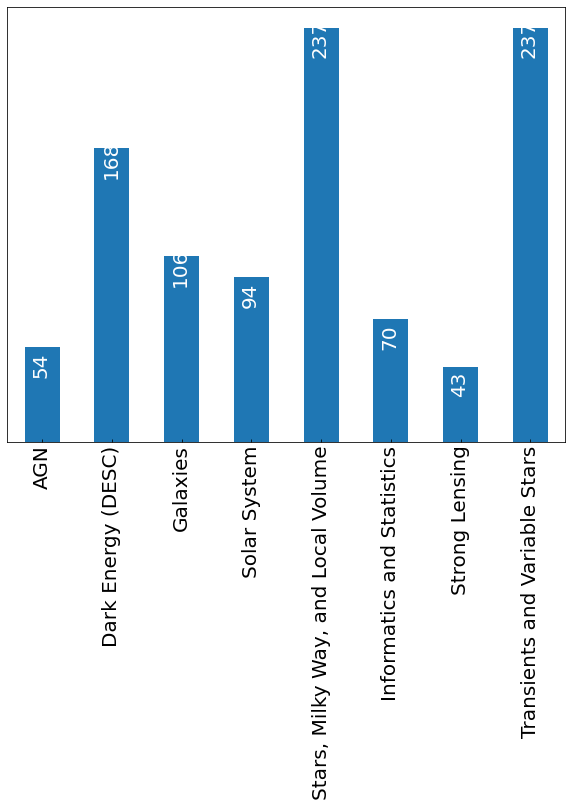

In [18]:

tmp = df_[["Email", "SC"]].drop_duplicates().groupby("SC").count().rename(newnames)
ax = tmp.plot(kind="bar", legend=False, figsize=(10,8), fontsize=20, rot=90, 
              )

ax.set_yticks([])
#ax.set_xticks(ax.g)
for p in ax.patches:
    b = p.get_bbox()
    val = "{:d}".format(int(b.y1 + b.y0))
    ax.annotate(val, ((b.x0 + b.x1)/2 + -0.15, b.y1 + -15), rotation=90, 
                color="w", fontsize=20)
ax.set_xlabel("")
pl.savefig("SCbars.png")

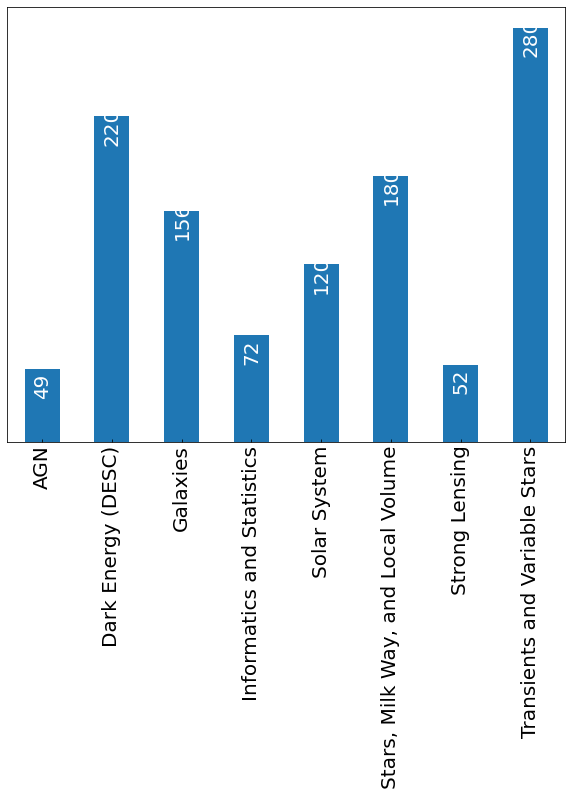

In [19]:

sccounts = pd.DataFrame.from_dict(
    {"AGN": 49,
    "Dark Energy (DESC)": 220,
     "Galaxies": 156,
   "Informatics and Statistics": 72,
      "Solar System": 120,
   "Stars, Milk Way, and Local Volume": 180,
     "Strong Lensing": 52,
  "Transients and Variable Stars": 280, }, orient="index")

ax = sccounts.plot(kind="bar", legend=False, figsize=(10,8), fontsize=20, rot=90, 
              )

ax.set_yticks([])
#ax.set_xticks(ax.g)
for p in ax.patches:
    b = p.get_bbox()
    val = "{:d}".format(int(b.y1 + b.y0))
    ax.annotate(val, ((b.x0 + b.x1)/2 - 0.13, b.y1 + -17), rotation=90, color="w", fontsize=20)
ax.set_xlabel("")
pl.savefig("SCbars.png")

2093

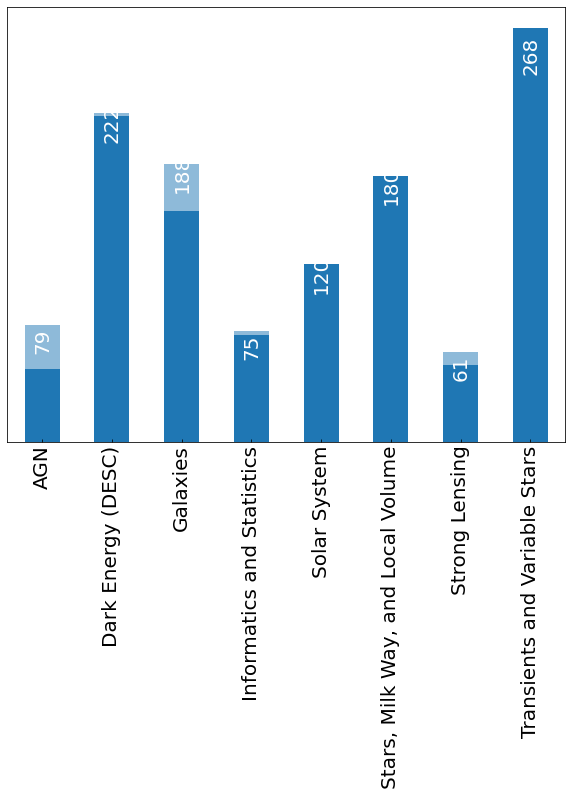

In [20]:
sccounts0 = pd.DataFrame.from_dict(
    {"AGN": 79,
    "Dark Energy (DESC)": 222,
     "Galaxies": 188,
   "Informatics and Statistics": 75,
      "Solar System": 120,
   "Stars, Milk Way, and Local Volume": 180,
     "Strong Lensing": 61,
  "Transients and Variable Stars": 268, }, orient="index")
allmembers = np.sum(np.array(list(sccounts0.values)))

ax = sccounts0.plot(kind="bar", legend=False, figsize=(10,8), fontsize=20, rot=90, alpha=0.5)
ax.set_yticks([])
#ax.set_xticks(ax.g)
for p in ax.patches:
    b = p.get_bbox()
    val = "{:d}".format(int(b.y1 + b.y0))
    ax.annotate(val, ((b.x0 + b.x1)/2 - 0.13, b.y1 + -17), rotation=90, color="w", fontsize=20)
ax.set_xlabel("")

sccounts = pd.DataFrame.from_dict(
   {"AGN": 49,
    "Dark Energy (DESC)": 220,
     "Galaxies": 156,
   "Informatics and Statistics": 72,
      "Solar System": 120,
   "Stars, Milk Way, and Local Volume": 180,
     "Strong Lensing": 52,
  "Transients and Variable Stars": 280, }, orient="index")
sccounts.plot(kind="bar", legend=False, figsize=(10,8), fontsize=20, rot=90, 
              ax=ax)

pl.savefig("SCbars.png")
allmembers + 900

In [21]:
tvsdf = pd.read_csv("LSST_TVS_subgroups - Sheet1.csv")[
    ["last name","first name","affiliation","email"]].rename(
    {"first name":"First Name",
    "last name":"Last Name",
    "email":"Email",
    "affiliation":"Company"}, axis=1)
tvsdf["SC"] = ["TVS"] * len(tvsdf)
tvsmerged = pd.concat([tvsdf,df_[["First Name",
    "Last Name",
    "Email",
    "SC"]]]).drop_duplicates()
tvsmerged1 = tvsmerged[~(tvsmerged.SC == "Transients")]
tvsmerged1.shape, tvsmerged.shape

((1293, 5), (1293, 5))

In [22]:
tvsmerged1["SC"] = tvsmerged1["SC"].map(lambda x: x.replace("TVS", 
                                "Transients and Variable Stars"))

In [23]:
desc = pd.read_csv("DESCcontactList.csv")
desc
desc["First Name"] = desc.Name.map(lambda x: x.split()[0])
desc["Last Name"] = desc.Name.map(lambda x: ' '.join(x.split()[1:]))
desc["SC"] = ["DESC"] * len(desc)
desc["Email"] = [""] * len(desc)
desc["Company"] = [""] * len(desc)
desc = desc[["First Name","Last Name","SC", "Email", "Company"]]
desc

,First Name,Last Name,SC,Email,Company
0,Michel,Aguena,DESC,,
1,Greg,Aldering,DESC,,
2,Steven,Allen,DESC,,
3,Husni,Almoubayyed,DESC,,
4,David,Alonso,DESC,,
...,...,...,...,...,...
210,Peter,Yoachim,DESC,,
211,Andrew,Zentner,DESC,,
212,Hu,Zhan,DESC,,
213,Gong-Bo,Zhao,DESC,,


In [24]:
df_.head()


,Company,First Name,Last Name,SC,Email,state,First,Last,firstlast
0,University of Washington,Eric,Agol,Transients and Variable Stars,agol@astro.washington.edu,Washington,Eric,Agol,EricAgol
1,NaN,Eric,Agol,Transients and Variable Stars,agol@astro.washington.edu,NaN,Eric,Agol,EricAgol
2,NaN,Eric,Agol,Strong Lensing,agol@astro.washington.edu,NaN,Eric,Agol,EricAgol
3,NaN,Javier,Alonso-Garcia,Transients and Variable Stars,javier.alonso@uantof.cl,NaN,Javier,Alonso-Garcia,JavierAlonso-Garcia
4,NaN,Javier,Alonso-Garcia,Transients and Variable Stars,javier.alonso@uantof.cl,NaN,Javier,Alonso-Garcia,JavierAlonso-Garcia


In [25]:
for i,f in enumerate(zip(desc["Last Name"].values,desc["First Name"].values)):
    tmp = (tvsmerged1[(tvsmerged1["First Name"] == f[1]) * 
          (tvsmerged1["Last Name"] == f[0])])
    if len(tmp)>0:
        desc.iloc[i]["Company"] = tmp["Company"].values[0] 
        desc.iloc[i]["Email"] = tmp["Email"].values[0] 


In [26]:
df_ = pd.concat([tvsmerged1[~(tvsmerged1.SC == "DESC")], desc])
df_

,Last Name,First Name,Company,Email,SC
0,Agol,Eric,University of Washington,agol@astro.washington.edu,Transients and Variable Stars
1,Alonso-Garcia,Javier,NaN,javier.alonso@uantof.cl,Transients and Variable Stars
2,Anderson,Scott,University of Washington,anderson@astro.washington.edu,Transients and Variable Stars
3,Andreoni,Igor,Caltech,andreoni@caltech.edu,Transients and Variable Stars
4,Antonino,Cucchiara,University of the Virgin Islands,antonino.cucchiara@uvi.edu,Transients and Variable Stars
...,...,...,...,...,...
210,Yoachim,Peter,NaN,yoachim@uw.edu,DESC
211,Zentner,Andrew,NaN,zentner@pitt.edu,DESC
212,Zhan,Hu,NaN,zhanhu@nao.cas.cn,DESC
213,Zhao,Gong-Bo,NaN,cn@cn.cn,DESC


In [27]:
#tvsdesvmerged = tvsmerged1.merge(desc, on=[
#    "First Name","Last Name"], how="right").drop_duplicates()
#tvsdesvmerged.drop("")

In [28]:
df_.Company.unique()

array(['University of Washington', nan, 'Caltech',
       'University of the Virgin Islands',
       'INAF - Osservatorio Astronomico di Roma', 'LCOGT/UCSB',
       'University of Arizona', 'Las Cumbres Observatory',
       'Northwestern University',
       'INAF - Osservatorio Astrofisico di Torino / SNS-Scuola Normale',
       'University of Texas at Austin', 'University of Washington/LSST',
       'Harvard Smithsonian Center for Astrophysics',
       'Liverpool John Moores University',
       'University of Maryland College Park', 'New York University',
       'Stockholm University/Oskar Klein Centre',
       'University of California Berkeley', 'University of Portsmouth',
       'INAF - Osservatorio Astronomico di Palermo',
       'University of Rome Tor Vergata -- INAF Rome astronomical Observatory',
       'LCOGT', 'INAF - Osservatorio Astronomico di Brera',
       'INAF - Osservatorio Astronomico di Capodimonte',
       'Pennsylvania State University', 'University of Nova Gorica

In [29]:
df_state = pd.read_csv("statets.csv", sep="\t", header=None)

In [30]:
df_state.head()

,0,1,2,3
0,AL,Alabama,Montgomery,"December 14, 1819"
1,AK,Alaska,Juneau,"January 3, 1959"
2,AZ,Arizona,Phoenix,"February 14, 1912"
3,AR,Arkansas,Little Rock,"June 15, 1836"
4,CA,California,Sacramento,"September 9, 1850"


In [31]:
df_state.append({0:"DC", 1:"DC"},  ignore_index=True )

/var/folders/9p/2yw79snx27scqbt2xszxkfyc0000gp/T/ipykernel_47677/2458538385.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_state.append({0:"DC", 1:"DC"},  ignore_index=True )


,0,1,2,3
0,AL,Alabama,Montgomery,"December 14, 1819"
1,AK,Alaska,Juneau,"January 3, 1959"
2,AZ,Arizona,Phoenix,"February 14, 1912"
3,AR,Arkansas,Little Rock,"June 15, 1836"
4,CA,California,Sacramento,"September 9, 1850"
5,CO,Colorado,Denver,"August 1, 1876"
6,CT,Connecticut,Hartford,"January 9, 1788"
7,DE,Delaware,Dover,"December 7, 1787"
8,FL,Florida,Tallahassee,"March 3, 1845"
9,GA,Georgia,Atlanta,"January 2, 1788"


In [32]:
df_['state'] = df_.Company.apply(lambda x: x if isinstance(x, float)  else x.replace("University of ", ""))
#for state in df_state:
    

In [33]:
df_.state.unique()

array(['Washington', nan, 'Caltech', 'the Virgin Islands',
       'INAF - Osservatorio Astronomico di Roma', 'LCOGT/UCSB', 'Arizona',
       'Las Cumbres Observatory', 'Northwestern University',
       'INAF - Osservatorio Astrofisico di Torino / SNS-Scuola Normale',
       'Texas at Austin', 'Washington/LSST',
       'Harvard Smithsonian Center for Astrophysics',
       'Liverpool John Moores University', 'Maryland College Park',
       'New York University', 'Stockholm University/Oskar Klein Centre',
       'California Berkeley', 'Portsmouth',
       'INAF - Osservatorio Astronomico di Palermo',
       'Rome Tor Vergata -- INAF Rome astronomical Observatory', 'LCOGT',
       'INAF - Osservatorio Astronomico di Brera',
       'INAF - Osservatorio Astronomico di Capodimonte',
       'Pennsylvania State University', 'Nova Gorica',
       'INAF - Osservatorio Astronomico di Rome',
       'Texas A&M / Mitchell Institute for Fundamental Physics and Astronomy',
       'South African Astrono

In [34]:
statesdic = {"IAC": "Spain", "Arizona":"Arizona",'Lawrence Livermore National Laboratory': 'California',
       'NASA Johnson Space Center': 'California', 
'Washington':"Washington", 'Columbia University': 'New York',
       'UC Berkeley/LBNL': 'California', 
       'KIPAC Kavli Institute for Particle Astrophysics and Cosmology': 'California', 
       'Oxford':"UK", 'Universidad de Antofagasta':"Chile", ' California Davis': 'California',
       'Universidad Andres Bello':"Chile",
       'Laboratoire de Le Accelerateur Lineaire (LAL)':'France', 'LPNHE':'France',
       'INAF-Osservatorio Astronomico di Roma':"Italy",
       'Universidad Diego Portales':"Chile", 'LCOGT & UC Santa Barbara':"California",
       'Jet Propulsion Lab':"California", 'IPAC Caltech':"California",
       'Lawrence Berkeley National Laboratory':"California", 'APC':"France", ' Chicago':"Illinois",
       'Laboratory for Atmosphere and Space Physics':"Colorado",
       'Colorado at Boulder':"Colorado", 'Pennsylvania State University':"Pennsylvania",
       'Yale University':"Connecticut", 'LPNHE/IN2P3':"France", 'Georgia Institute of Technology':"Georgia",
       'INAF-Osservatorio Astrofisico di Torino & SNS-Scuola Normale':"Italy",
       'Observat\xc3\xb3rio Nacional/BGP-LSST/LIneA':"Chile",
       'Queens University Belfast':"Ireland",
       'Universidad de La Serena':"Chile", 'Universidad de Atacama':"Chile",
       'SLAC Nationatl Acceleratory Laboratory':"California", 'LPSC':"Colorado",
       'Universidad Metropolitana de Ciencias de la Educacion  (UMCE)':"Chile",
       'Pontifilecia Universidad Catolica de Chile':"Chile", ' California Irvine':'California',
       'Booz Allen Hamilton':"DC", 'Pontifica Universidad Catolica de Chile':"Chile",
       'Stanford Univerisity':'California', 'SUNY-SB':"New York", 'Cornell University':"Illinois",
       'Stanford University':'California', 'SLAC National Accelerator Laboratory':'California',
       'Michigan State University':"Michigan", ' Texas at Austin':"Texas", ' Michigan':"Michigan",
       'INAF':"Italy", '  Cambridge':"UK",
       'Harvard Smithsonian Center for Astrophysics':"Massachusetts", ' Pennsylvania':"Pennsylvania",
       'Argonne National Laboratory':"Illinois", 'Liverpool John Moores University':"UK",
       'New York University':"New York", 
       'INAF-Osservatorio Astronomico di Trieste':"Italy", 'Laboratoire de l':"France", 
             "Auburn": "Alabama",
            "B612 Astroid Institute/Washington": "Washington",
            "George Mason University":"Virginia","Rider University":"New Jersey"}

In [35]:
df_['state1'] = df_.state.map(statesdic)

In [36]:
df_[['Email', 'state', 'state1']]

,Email,state,state1
0,agol@astro.washington.edu,Washington,Washington
1,javier.alonso@uantof.cl,NaN,NaN
2,anderson@astro.washington.edu,Washington,Washington
3,andreoni@caltech.edu,Caltech,NaN
4,antonino.cucchiara@uvi.edu,the Virgin Islands,NaN
...,...,...,...
210,yoachim@uw.edu,NaN,NaN
211,zentner@pitt.edu,NaN,NaN
212,zhanhu@nao.cas.cn,NaN,NaN
213,cn@cn.cn,NaN,NaN


In [37]:
df_["Email"].str.contains("@").sum(), df_["Email"].shape

(1293, (1293,))

In [38]:
emcountry={"it":"Italy", "fr":"France", "uk":"UK", "au":"Australia", "br":"Brasil", "cl":"Chile", 
           "nz":"New Zealand","fi":"Finland", "cz":"Czech Republic", "dk":"Damnark","de":"Germany",
          "jp":"Japan", "ca":"Canada", "cn":"China", "dk": "Danmark"}

def statebyEmailEnd(email):
    if not isinstance(email, float):
        if email.split('.')[-1].strip() in emcountry.keys():
            return (emcountry[email.split('.')[-1].strip()])
        else:     return np.nan
    else: return np.nan

In [39]:
df_['state2'] = df_.Email.apply(statebyEmailEnd)

In [40]:
df_[['Email', 'state1', 'state2']]

,Email,state1,state2
0,agol@astro.washington.edu,Washington,NaN
1,javier.alonso@uantof.cl,NaN,Chile
2,anderson@astro.washington.edu,Washington,NaN
3,andreoni@caltech.edu,NaN,NaN
4,antonino.cucchiara@uvi.edu,NaN,NaN
...,...,...,...
210,yoachim@uw.edu,NaN,NaN
211,zentner@pitt.edu,NaN,NaN
212,zhanhu@nao.cas.cn,NaN,China
213,cn@cn.cn,NaN,China


In [41]:
df_[(((df_[['state1']].isnull()).values) * ((df_[['state2']].isnull()).values)).flatten()]

,Last Name,First Name,Company,Email,SC,state,state1,state2
3,Andreoni,Igor,Caltech,andreoni@caltech.edu,Transients and Variable Stars,Caltech,NaN,NaN
4,Antonino,Cucchiara,University of the Virgin Islands,antonino.cucchiara@uvi.edu,Transients and Variable Stars,the Virgin Islands,NaN,NaN
6,Arcavi,Iair,LCOGT/UCSB,arcavi@gmail.com,Transients and Variable Stars,LCOGT/UCSB,NaN,NaN
8,Bachelet,Etienne,Las Cumbres Observatory,etibachelet@gmail.com,Transients and Variable Stars,Las Cumbres Observatory,NaN,NaN
9,Baldeschi,Adriano,Northwestern University,adriano.baldeschi@northwestern.edu,Transients and Variable Stars,Northwestern University,NaN,NaN
...,...,...,...,...,...,...,...,...
208,Wiesner,Matthew,NaN,matthewwiesner@aol.com,DESC,NaN,NaN,NaN
209,Wood-Vasey,Michael,University of Pittsburgh,wmwv@pitt.edu,DESC,Pittsburgh,NaN,NaN
210,Yoachim,Peter,NaN,yoachim@uw.edu,DESC,NaN,NaN,NaN
211,Zentner,Andrew,NaN,zentner@pitt.edu,DESC,NaN,NaN,NaN


In [42]:
df_['state3'] = [s[0] if not isinstance(s[0], float) else s[1] for s in zip(df_['state1'], df_['state2'])]

In [43]:
pd.Series([em if  isinstance(em, float) else '.'.join(em.split("@")[-1].split('.')[-2:])
 for em in df_['Email'][np.array([isinstance(v, float) 
                                 for v in df_.state3.values ])].values ]).unique()

array(['caltech.edu', 'uvi.edu', 'gmail.com', 'northwestern.edu',
       'uw.edu', 'umd.edu', 'berkeley.edu', 'lco.global', 'ung.si',
       'tamu.edu', 'ac.za', 'nasa.gov', 'ohio.edu', 'lsu.edu', 'noao.edu',
       'wwu.edu', 'carnegiescience.edu', 'upenn.edu', 'llnl.gov',
       'uchicago.edu', 'ucar.edu', 'psu.edu', 'monash.edu', 'harvard.edu',
       'lsst.org', 'anl.gov', 'rice.edu', 'aavso.org', 'sdsu.edu',
       'udel.edu', 'illinois.edu', 'aob.rs', 'rutgers.edu',
       'washington.edu', 'oswego.edu', 'uwm.edu', 'villanova.edu',
       'cmu.edu', 'stsci.edu', 'gemini.edu', 'edu.tw', 'uva.nl',
       'lbl.gov', 'fit.edu', 'wisc.edu', 'ligo.org', 'ohio-state.edu',
       'lehigh.edu', 'seti.org', 'asu.edu', 'stanford.edu',
       'columbia.edu', 'vanderbilt.edu', 'princeton.edu', 'konkoly.hu',
       'gwu.edu', 'nyu.edu', 'pitt.edu', 'mit.edu', 'edu.pl',
       'arizona.edu', 'lcogt.net', 'nrao.edu', 'lanl.gov', 'su.se',
       'purdue.edu', 'gmu.edu', 'akhlaghi.org', 'ucdavis.e

In [44]:
df_.state2.unique(), df_.state3.unique()

(array([nan, 'Chile', 'Italy', 'Germany', 'UK', 'France', 'New Zealand',
        'Canada', 'Brasil', 'China', 'Australia', 'Czech Republic',
        'Finland', 'Danmark'], dtype=object),
 array(['Washington', 'Chile', nan, 'Italy', 'Arizona', 'Germany',
        'Massachusetts', 'UK', 'New York', 'Pennsylvania', 'Michigan',
        'France', 'New Zealand', 'California', 'New Jersey', 'Canada',
        'Brasil', 'China', 'Australia', 'Czech Republic', 'Finland',
        'Danmark'], dtype=object))

In [45]:
stateByEmail = {'ucdavis.edu':"California", 
 'uchicago.edu': "Illinois",
 'psu.edu': "Pennsylvania",
 'stanford.edu':"California",
       'umich.edu': "Michigan",
 'harvard.edu': "Massachusetts",
 'upenn.edu': "Pennsylvania",  
 'osu.edu':"Ohio",
       'berkeley.edu':"California", 
 'noao.edu':"Arizona", 
 'umd.edu':"Maryland", 
 'lcogt.net':"California", 
 'princeton.edu':"New Jersey",
       'asu.edu':"Arizona", 
 'nasa.gov':np.nan, 
 'sarahbridle.net':np.nan, 
 'ttu.edu':"Texas", 
 'uwyo.edu':"Wyoming",
       'tamu.edu':"Texas", 
 'caltech.edu':"California", 
 'illinois.edu':"Illinois", 
 'jhu.edu':"Maryland", 
 'uci.edu':"California",
       'ucsd.edu':"California", 
 'lsst.org':"Washington", 
 'yale.edu':"Connecticut", 
 'cofc.edu':"South Carolina", 
 'uw.edu':"Washington", 
 'cas.cn':np.nan,
       'purdue.edu':"Indiana", 
 'cornell.edu':"Illinois", 
 'arizona.edu':"Arizona", 
 'bnl.gov':"California", 
 'nrao.edu':np.nan,
       'ohio.edu':"Ohio", 
 'wayne.edu':"Michigan", 
 'lsu.edu':"Louisiana", 
 'washington.edu':"Washington", 
 'wwu.edu':"Washington",
       'amherst.edu':"Massachusetts", 
 'columbia.edu':"New York", 
 'uvi.edu':"Virginia", 
 'dawsonresearch.com':"California",
       'aip.de':"Germany", 
 'nku.edu':"Kentucky", 
 'llnl.gov':"California", 
 'brown.edu':"Rhode Island", 
 'hawaii.edu':"Hawaii",
       'me.com':np.nan, 
 'ucsb.edu':"California", 
 'fnal.gov':"Illinois", 
 'carnegiescience.edu':"California",
       'northwestern.edu':"Illinois", 
 'stsci.edu':"DC", 
 'navy.mil':"DC",
 'utexas.edu':"Texas", 
       'cmu.edu':"Pennsylvania", 
 'lanl.gov':"California", 
 'nd.edu':"Delaware", 
 'rutgers.edu':"New Jersey", 
 'ou.edu':"Oklahoma",
       'udel.edu':"Delaware", 
 'ung.si':"Slovenia", 
 'gatech.edu':"Georgia", 
 'ucolick.org':"California", 
 'anl.gov':"Illinois",
       'villanova.edu':"Pennsylvania", 
 'colorado.edu':"Colorado", 
 'adlerplanetarium.org':"Illinois",
       'haverford.edu':"Pennsylvania", 
 'att.net':np.nan, 
 'rice.edu':"Texas", 
 'hws.edu':"Hawaii", 
 'aavso.org':np.nan,
       'gsu.edu':"Georgia", 
 'umkc.edu':"Missouri", 
 'bell-labs.com':"California", 
 'psi.edu':"Pennsylvania",
       'uni-heidelberg.de':"Germany", 
 'utdallas.edu':"Texas", 
 'utah.edu':"Utah", 
 'jarvis.net':np.nan,
       'h-bar.com':np.nan, 
 'aob.rs':np.nan, 
 'virginia.edu':"Virginia", 
 'oswego.edu':"New York", 
 'uwm.edu':"Masachussets",
       'lbl.gov':"California", 
 'iac.es':"Spain", 
 'ac.rs':"Serbia", 
 'albany.edu':"New York", 
 'mac.com':np.nan, 
'usna.edu':"Maryland",
       'yahoo.com':np.nan, 
 'see.com':np.nan, 
 'ufl.edu':"Florida", 
 'icrar.org':"Australia", 
 'gemini.edu':"Chile",
       'nau.edu':"Arizona", 
 'lowell.edu':"Masachussets", 
 'pitt.edu':"Pennsylvania", 
 'gmail.com ':np.nan, 
 'fit.edu':"Florida",
       'longwood.edu':"Virginia", 
 'lehigh.edu':"Pennsylvania", 
 'normalesup.org':"France",
       'missouristate.edu':"Missouri", 
 'columbusstate.edu':"Ohio", 
 'byu.edu':"Utah", 
 'mpg.de':"Germany",
       'usra.edu':"Maryland", 
 'ucr.edu':"California", 
 'ucla.edu':"California", 
 'drexel.edu':"Pennsylvania", 'ucsc.edu':"California",
       'jhuapl.edu':"Maryland", 
 'umn.edu':"Minnesota", 
 'indiana.edu':"Indiana", 
 'ucf.edu':"Florida", 
 'unl.edu':"Nebraska",
       'sdsu.edu':"California", 
 'mtu.edu':"Michigan", 
 'unt.edu':"Texas", 
 'ciw.edu':"California", 
 'apsu.edu':"Tennessee", 
 'uc.edu':"California",
       'gov.pl':"Poland", 
 'lynchburg.edu':"Virginia", 
 'ornl.gov':"Tennessee", 
 'vanderbilt.edu':"Tennessee", 
 'swri.edu':"Colorado",
       'msu.edu':"Massachusetts", 
 'lco.global':"California", 
 'ipmu.jp':"Japan", 
 'dartmouth.edu':"New Hampshire", 
 'nau.edu ':"Arizona",
  'nau.edu':"Arizona",
       'sunysb.edu':"New York", 
 'ubc.ca':"California", 
 'stvincent.edu':"Pennsylvania", 
 'uh.edu':"Texas", 
 'duke.edu':"North Carolina",
                'uiuc.edu':"Illinois",
 'umass.edu':"Massachusetts", 
 'bu.edu':"Massachusetts", 
 'aol.com':np.nan, 
 'Duke.edu':"North Carolina", 
 'nyu.edu':"New York",
 'jpl.nasa.gov':"California", 
 'nao.cas.cn':"China", 
 'aoc.nrao.edu':"Arizona", 
  'seti.org':"California", 
'unm.edu':"New Mexico", 
 'mit.edu': "Massachusetts",
'b612foundation.org':"Washington", 
'aob.rs':"Serbia", 
'astro.rit.edu':"New York", 'nrao.edu':"Arizona",
'gmu.edu':"Virginia",
'mnsu.edu':"Minnesota", 
'oberlin.edu':"Ohio", 
'konkoly.hu':"Hungary", 
'usf.edu':"Florida",
'case.edu':"Ohio"}
     #  'case.edu'
    
def sttatetbyemailend(email):
    if isinstance(email, float): return np.nan
    else: 
        em = '.'.join(email.split("@")[-1].split('.')[-2:])
        if em in stateByEmail.keys():
            return stateByEmail[em]
        else: return np.nan
        
def statebydesc(fn, ln):
    return descmembers[(descmembers.loc["First Name"] == fn) * (descmembers.loc["Last Name"] == ln) ]["State"],\
        descmembers[(descmembers.loc["First Name"] == fn) * (descmembers.loc["Last Name"] == ln) ]["Cpuntry"]
    
        


In [46]:
df_['state4'] = df_.Email.apply(sttatetbyemailend)

In [47]:
df_.state4.describe()

count            670
unique            43
top       California
freq             157
Name: state4, dtype: object

In [48]:
df_['country'] = [s[0] if not isinstance(s[0], float) else s[1] for s in zip(df_['state3'], df_['state4'])]

In [49]:
df_.country.describe()

count           1056
unique            52
top       California
freq             156
Name: country, dtype: object

In [50]:
(((df_[['country']].isnull()).values)).flatten()

array([False, False, False, ..., False, False,  True])

In [51]:
def getemail(x):
    if not x=='' :
        return x.split("@")[1] 
    else: return ''

    df_[(((df_[['state1']].isnull()).values) * ((df_[['state2']].isnull()).values) * 
     ((
         df_[['country']].isnull()).values)).flatten()].Email.apply(getemail()).unique()

In [52]:
df_.describe()

,Last Name,First Name,Company,Email,SC,state,state1,state2,state3,state4,country
count,1293,1293,250,1293,1293,250,37,388,421,670,1056
unique,730,527,155,742,8,155,11,13,21,43,52
top,Strauss,David,University of Washington,us@us.edu,Transients and Variable Stars,Washington,Washington,Italy,Italy,California,California
freq,7,32,10,31,474,10,10,121,121,157,156


In [53]:
df_.to_csv("mydb.csv")

In [54]:
df_ = pd.read_csv("mydb.csv")

In [55]:
df_.shape, df_.dropna(subset=["country"]).shape

((1293, 12), (1056, 12))

In [56]:
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


<AxesSubplot:>

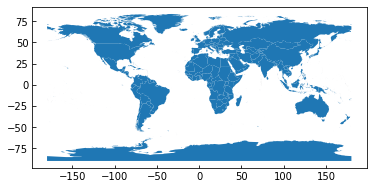

In [57]:
countriesshp = gpd.GeoDataFrame.from_file("TM_WORLD_BORDERS_SIMPL-0.3.shp")
                                    
aax = countriesshp.plot()
statetsshp = gpd.GeoDataFrame.from_file("cb_2016_us_state_500k.shp")
statetsshp.plot(ax=ax, color='red')


In [58]:
statetsshp.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,01,01779775,0400000US01,01,AL,Alabama,00,131173688951,4593686489,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ..."
1,02,01785533,0400000US02,02,AK,Alaska,00,1477946266785,245390495931,"MULTIPOLYGON (((-134.73726 58.26135, -134.7344..."
2,04,01779777,0400000US04,04,AZ,Arizona,00,294198560125,1027346486,"POLYGON ((-114.81629 32.50804, -114.81432 32.5..."
3,05,00068085,0400000US05,05,AR,Arkansas,00,134771517596,2960191698,"POLYGON ((-94.61783 36.49941, -94.61765 36.499..."
4,06,01779778,0400000US06,06,CA,California,00,403501101370,20466718403,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."


In [59]:
countriesshp["NAME"][["United" in cn for cn in  countriesshp["NAME"].values]]

150    United States Minor Outlying Islands
204             United Republic of Tanzania
206                          United Kingdom
208                           United States
216            United States Virgin Islands
227                    United Arab Emirates
Name: NAME, dtype: object

In [60]:
dfgroup = df_.drop_duplicates("Email").\
    groupby("country").count()[["Last Name"]].\
    rename(columns={"Last Name":"count"})

In [61]:
dfgroup.head()

,count
country,
Arizona,37
Australia,6
Brasil,8
California,95
Canada,3


In [62]:
countriesshp.merge(dfgroup, right_index=True, left_on="NAME")["count"].describe()

count    16.000000
mean     10.937500
std      18.763329
min       1.000000
25%       2.750000
50%       3.000000
75%       5.250000
max      67.000000
Name: count, dtype: float64

In [63]:
statetsshp.NAME

0                                          Alabama
1                                           Alaska
2                                          Arizona
3                                         Arkansas
4                                       California
5                                         Colorado
6                                      Connecticut
7                                         Delaware
8                             District of Columbia
9                                          Georgia
10                                          Hawaii
11                                           Idaho
12                                        Illinois
13                                         Indiana
14                                            Iowa
15                                          Kansas
16                                        Maryland
17                                       Minnesota
18                                     Mississippi
19                             

In [64]:
statetsshp.merge(dfgroup, right_index=True, left_on="NAME")["count"].describe()

count    32.00000
mean     11.59375
std      19.11402
min       1.00000
25%       2.00000
50%       4.00000
75%       9.25000
max      95.00000
Name: count, dtype: float64

In [65]:
df_.country[[v  == "UK" for v in df_.country.values]] = "United Kingdom"

/var/folders/9p/2yw79snx27scqbt2xszxkfyc0000gp/T/ipykernel_47677/1488396229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_.country[[v  == "UK" for v in df_.country.values]] = "United Kingdom"


In [66]:
df_.country[[v  == "United Kingdom" for v in df_.country.values]]
df_.country[[v  == "DC" for v in df_.country.values]]

126     DC
161     DC
186     DC
232     DC
435     DC
490     DC
524     DC
525     DC
601     DC
751     DC
752     DC
793     DC
1220    DC
Name: country, dtype: object

In [67]:
df_.country[[v  == "DC" for v in df_.country.values]] = "Maryland"

/var/folders/9p/2yw79snx27scqbt2xszxkfyc0000gp/T/ipykernel_47677/159534308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_.country[[v  == "DC" for v in df_.country.values]] = "Maryland"


In [68]:
i0 = df_[df_["Last Name"] == "Lochner"].index#,#["state5"] = "South Africa"
i1 = df_[df_["Last Name"] == "Buckley"].index#["state5"] = "South Africa"
df_.set_value(i0, 'country', "South Africa")
df_.set_value(i1, 'country', "South Africa")
i0 = df_[df_["Last Name"] == "Peiris"].index#,#["state5"] = "South Africa"
i1 = df_[df_["Last Name"] == "Biswas"].index#["state5"] = "South Africa"
df_.set_value(i0, 'country', "Sweden")
df_.set_value(i1, 'country', "Sweden")


AttributeError: 'DataFrame' object has no attribute 'set_value'

In [ ]:
df_.columns

In [ ]:
df_[['Company', 'Email', 'First Name', 'Last Name', 'SC',
       'state']].to_csv("SCcontactDBmodifiedFBBAugust2020.csv", index=False)

In [ ]:
df_.head()

In [ ]:
df_.country.unique()

In [ ]:
dfgroup = df_.\
    groupby("country").count()[["Last Name"]].\
    rename(columns={"Last Name":"count"})

#.drop_duplicates("Email").\

In [69]:
dfgroup.sort_values("count")

,count
country,
Wyoming,1
New Hampshire,1
Kentucky,1
Hungary,1
Missouri,1
Finland,1
Danmark,1
Poland,1
Nebraska,1


In [70]:
dfgroup.index

Index(['Arizona', 'Australia', 'Brasil', 'California', 'Canada', 'Chile',
       'China', 'Colorado', 'Connecticut', 'Czech Republic', 'DC', 'Danmark',
       'Delaware', 'Finland', 'Florida', 'France', 'Georgia', 'Germany',
       'Hawaii', 'Hungary', 'Illinois', 'Indiana', 'Italy', 'Kentucky',
       'Louisiana', 'Maryland', 'Masachussets', 'Massachusetts', 'Michigan',
       'Missouri', 'Nebraska', 'New Hampshire', 'New Jersey', 'New York',
       'New Zealand', 'North Carolina', 'Ohio', 'Oklahoma', 'Pennsylvania',
       'Poland', 'Rhode Island', 'Serbia', 'Slovenia', 'South Carolina',
       'Spain', 'Tennessee', 'Texas', 'UK', 'Utah', 'Virginia', 'Washington',
       'Wyoming'],
      dtype='object', name='country')

In [71]:
['Arizona',  'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 
'Georgia',
        'New Hampshire', 'Hawaii',  'Illinois', 'Indiana',
        'Kentucky', 'Louisiana', 'Maryland', 
       'Massachusetts', 'Michigan', 'Missouri', 'Nebraska', 'New Jersey',
       'New York',  'North Carolina', 'Ohio', 'Oklahoma',
       'Pennsylvania', 'Poland', 'Rhode Island',
       'South Carolina', 'Spain', 'Tennessee', 'Texas',
       'Utah', 'Virginia', 'Washington', 'Wyoming']

['Arizona',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'Florida',
 'Georgia',
 'New Hampshire',
 'Hawaii',
 'Illinois',
 'Indiana',
 'Kentucky',
 'Louisiana',
 'Maryland',
 'Massachusetts',
 'Michigan',
 'Missouri',
 'Nebraska',
 'New Jersey',
 'New York',
 'North Carolina',
 'Ohio',
 'Oklahoma',
 'Pennsylvania',
 'Poland',
 'Rhode Island',
 'South Carolina',
 'Spain',
 'Tennessee',
 'Texas',
 'Utah',
 'Virginia',
 'Washington',
 'Wyoming']

In [72]:
logdfgroup = np.log10(dfgroup)

In [73]:
countriesshp.merge(logdfgroup+3, right_index=True, left_on="NAME", how='outer').dropna(subset=["count"]).NAME.unique()

array(['Australia', 'Canada', 'China', 'Chile', 'Czech Republic',
       'Finland', 'France', 'Georgia', 'Germany', 'Hungary', 'Italy',
       'New Zealand', 'Poland', 'Slovenia', 'Spain', 'Serbia', 'Arizona',
       'Brasil', 'California', 'Colorado', 'Connecticut', 'DC', 'Danmark',
       'Delaware', 'Florida', 'Hawaii', 'Illinois', 'Indiana', 'Kentucky',
       'Louisiana', 'Maryland', 'Masachussets', 'Massachusetts',
       'Michigan', 'Missouri', 'Nebraska', 'New Hampshire', 'New Jersey',
       'New York', 'North Carolina', 'Ohio', 'Oklahoma', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'Tennessee', 'Texas', 'UK',
       'Utah', 'Virginia', 'Washington', 'Wyoming'], dtype=object)

In [74]:
logdfgroup

,count
country,
Arizona,1.568202
Australia,0.778151
Brasil,0.903090
California,1.977724
Canada,0.477121
Chile,1.643453
China,0.602060
Colorado,0.602060
Connecticut,0.778151


In [75]:
statetsshp.merge(logdfgroup, right_index=True, left_on="NAME")

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,count
2,04,01779777,0400000US04,04,AZ,Arizona,00,294198560125,1027346486,"POLYGON ((-114.81629 32.50804, -114.81432 32.5...",1.568202
4,06,01779778,0400000US06,06,CA,California,00,403501101370,20466718403,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",1.977724
5,08,01779779,0400000US08,08,CO,Colorado,00,268429343790,1175112870,"POLYGON ((-109.06025 38.59933, -109.05954 38.7...",0.602060
6,09,01779780,0400000US09,09,CT,Connecticut,00,12542638347,1815476291,"MULTIPOLYGON (((-72.76143 41.24233, -72.75973 ...",0.778151
7,10,01779781,0400000US10,10,DE,Delaware,00,5047194742,1398720828,"MULTIPOLYGON (((-75.56555 39.51485, -75.56174 ...",0.477121
9,13,01705317,0400000US13,13,GA,Georgia,00,149169848456,4741100880,"MULTIPOLYGON (((-81.27939 31.30792, -81.27716 ...",0.602060
10,15,01779782,0400000US15,15,HI,Hawaii,00,16634100855,11777698394,"MULTIPOLYGON (((-175.74126 27.92406, -175.7363...",0.845098
12,17,01779784,0400000US17,17,IL,Illinois,00,143788697679,6206693598,"POLYGON ((-91.51297 40.18106, -91.51107 40.188...",1.531479
13,18,00448508,0400000US18,18,IN,Indiana,00,92790545247,1536767065,"POLYGON ((-88.09776 37.90403, -88.09162 37.905...",0.477121
16,24,01714934,0400000US24,24,MD,Maryland,00,25147754905,6983312282,"MULTIPOLYGON (((-76.05015 37.98691, -76.04998 ...",0.903090


In [76]:
countriesshp["centers"] = countriesshp.geometry.centroid
statetsshp["centers"] = statetsshp.geometry.centroid
allgeos = pd.concat([countriesshp[["NAME", "centers"]], statetsshp[["NAME", "centers"]]]).reset_index()

/var/folders/9p/2yw79snx27scqbt2xszxkfyc0000gp/T/ipykernel_47677/100827600.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  countriesshp["centers"] = countriesshp.geometry.centroid
/var/folders/9p/2yw79snx27scqbt2xszxkfyc0000gp/T/ipykernel_47677/100827600.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  statetsshp["centers"] = statetsshp.geometry.centroid


In [77]:
countriesshp.replace("Brazil", "Brasil", inplace=True)

In [78]:
tmp_ = countriesshp.merge(dfgroup, right_index=True, left_on="NAME", how='inner')
tmp_.NAME

8           Australia
20             Brasil
23             Canada
29              China
32              Chile
57     Czech Republic
59            Finland
64             France
67            Georgia
71            Germany
80            Hungary
85              Italy
159       New Zealand
163            Poland
183          Slovenia
187             Spain
237            Serbia
Name: NAME, dtype: object

In [79]:
logdfgroup + 10

,count
country,
Arizona,11.568202
Australia,10.778151
Brasil,10.903090
California,11.977724
Canada,10.477121
Chile,11.643453
China,10.602060
Colorado,10.602060
Connecticut,10.778151


NotImplementedError: fillna currently only supports filling with a scalar geometry

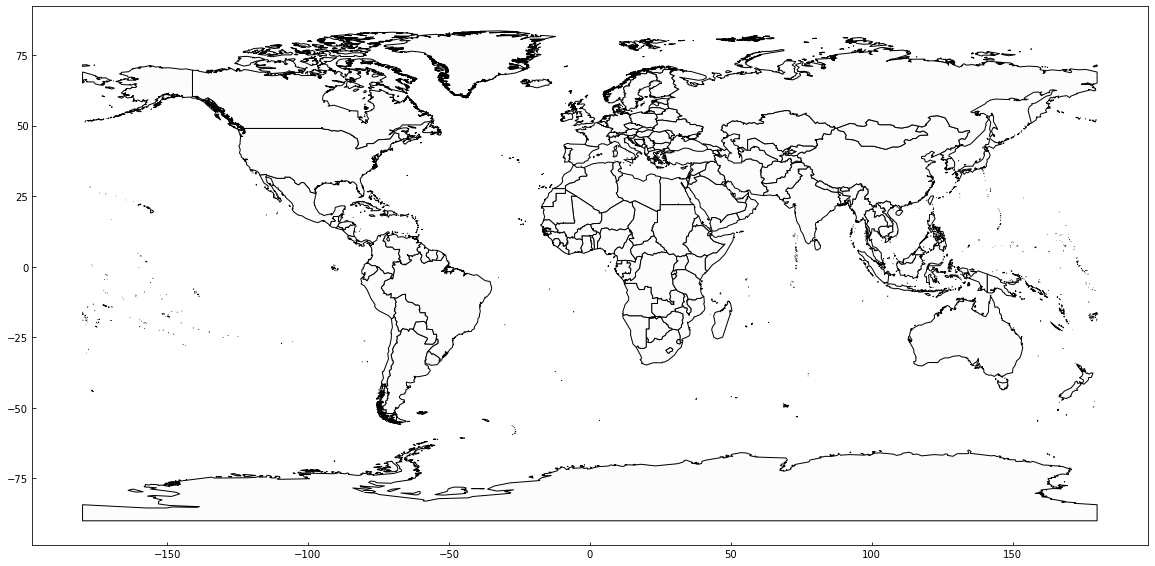

In [80]:
ax = countriesshp.plot(color="#fcfcfc", edgecolor="k", figsize=(20,20))
tmp_ = countriesshp.merge(logdfgroup+3, right_index=True, left_on="NAME", how='outer')
tmp_.fillna(0).plot(cmap="Blues",
                                                        column="count", ax=ax)
tmp_ = statetsshp.merge(logdfgroup+10, right_index=True, left_on="NAME", how='outer')
tmp_.fillna(0).plot(cmap="Oranges", 
                                                    column="count", ax=ax)
ax.axis('off')
pl.savefig("SCmap.png")


In [ ]:
viridis = cm.get_cmap('viridis', 256)
newcolors = viridis(np.linspace(0.5, 1, 256))
newcolors

In [ ]:
allgeos['centers'].values[0]

In [ ]:
statetsshp.merge(dfgroup, right_index=True, left_on="NAME")[["NAME",'count']]

In [ ]:
statetsshp.merge(dfgroup, right_index=True, left_on="NAME")[["NAME",'count']]

In [ ]:
pd.options.display.max_rows = 999

In [ ]:
countriesshp.merge(dfgroup, right_index=True, left_on="NAME")[["NAME", "count"]]

In [ ]:
countriesshp.merge(dfgroup, right_index=True, left_on="NAME")[["NAME", "count"]].shape

In [ ]:
allcontacts = pd.read_csv("contactdbexport.csv")
allcontacts["Company"].unique()

In [ ]:
df_.head()

In [ ]:
df_.head()

In [ ]:
from shapely.geometry import LineString # To create line geometries that can be used in a GeoDataFrame
def makeline(g0, g1):
    #print(g0,g1)
    start, end = [(g0.x, g0.y), (g1.x, g1.y)]
    line = LineString([start, end]), start, end
    #data = {'geometry': [line]}
    #return gpd.GeoDataFrame(pd.DataFrame(data, 
           #                                 columns = ['geometry'])) 
    return line

In [ ]:
ax = countriesshp.plot(color="#fcfcfc", edgecolor="k", figsize=(20,20))
countriesshp.merge(dfgroup, right_index=True, left_on="NAME").plot(cmap="Blues",
                                                        column="count", ax=ax)
statetsshp.merge(dfgroup, right_index=True, left_on="NAME").plot(cmap="Oranges", 
                                                    column="count", ax=ax)
#ax.axis('off')
g0, g1 = countriesshp[countriesshp["NAME"] == "Brasil"]["geometry"].centroid.values[0],\
countriesshp[countriesshp["NAME"] == "Italy"]["geometry"].centroid.values[0]
#makeline(g0, g1).plot(ax=ax)
#pl.plot(countriesshp['centers'][0], countriesshp['centers'][1])
#countriesshp.head(), countriesshp['centers'][0], countriesshp['centers'][1]

In [81]:
def getlinks(pairs):
    #print(allgeos["centers"][allgeos["NAME"] == pairs[0]].values[0], 
    #      allgeos["centers"][allgeos["NAME"] == pairs[1]].values[0])
    #print((allgeos["NAME"] == pairs[0]).sum())
    #print((allgeos["NAME"] == pairs[1]).sum())
    return allgeos["centers"][allgeos["NAME"] == pairs[0]].values[0], \
allgeos["centers"][allgeos["NAME"] == pairs[1]].values[0]


def pairup(mylist):
    pairs = []
    for i,l1 in enumerate(mylist):
        for l2 in mylist[i+1:]:
            if (l1 in allgeos["NAME"].values and l2 in allgeos["NAME"].values):
                #print(l1, l2)
                pairs.append((l1, l2))
    pairs, k = np.unique(np.array(pairs), axis=0, return_counts=1)
    #print(pairs)#print([(p[0], p[1]) for p in pairs])
    return [getlinks((p[0], p[1])) for p in pairs], k




In [82]:
getlinks(("Alabama", "California"))

(<shapely.geometry.point.Point at 0x11fa2e340>,
 <shapely.geometry.point.Point at 0x11fa2e640>)

In [83]:
df_["SC"].unique()

array(['Transients and Variable Stars', 'Strong Lensing',
       'Stars, Milky Way, and Local Volume', 'Statistics and Informatics',
       'Galaxies', 'AGN', 'Solar System', 'DESC'], dtype=object)

In [84]:
pairs = {}
for sc in df_["SC"].unique():
    pairs[sc] = []
    pairs[sc] = pairup(df_[df_.SC == sc]["country"].values)
    

In [85]:
pairs.keys()

dict_keys(['Transients and Variable Stars', 'Strong Lensing', 'Stars, Milky Way, and Local Volume', 'Statistics and Informatics', 'Galaxies', 'AGN', 'Solar System', 'DESC'])

Transients and Variable Stars
Strong Lensing
Stars, Milky Way, and Local Volume
Statistics and Informatics
Galaxies
AGN
Solar System
DESC


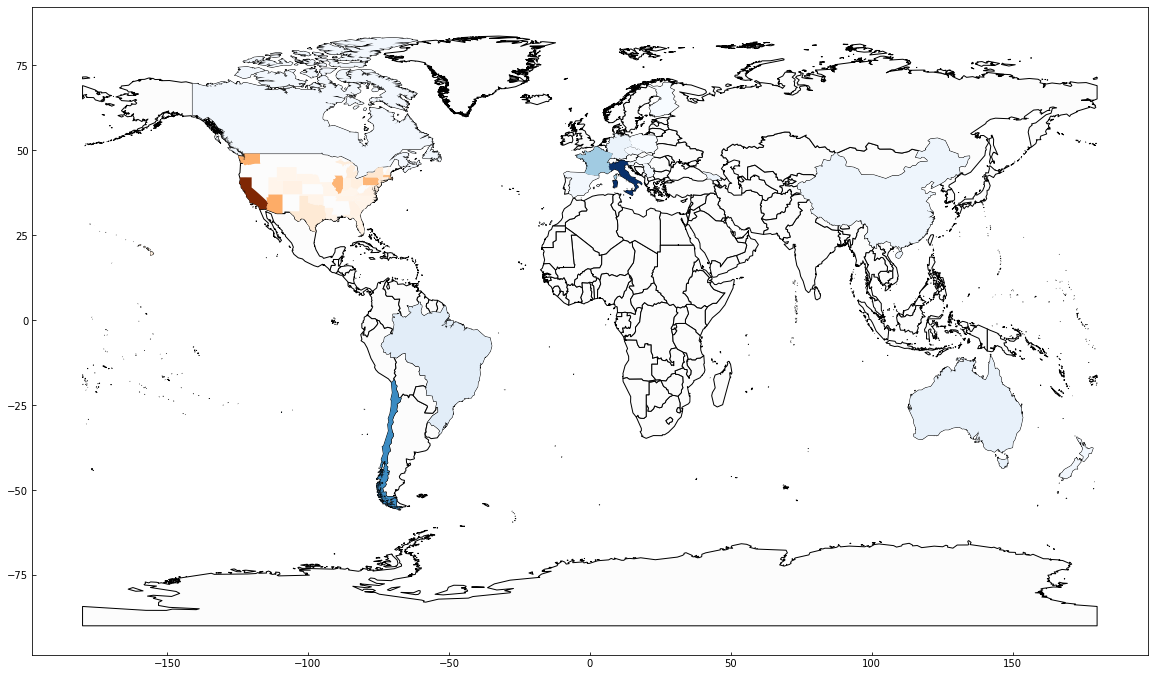

In [86]:
ax = pl.figure(figsize=(20,20)).add_subplot(111)
countriesshp.plot(color="#fcfcfc", edgecolor="k", ax=ax)
countriesshp.merge(dfgroup, right_index=True, left_on="NAME").plot(cmap="Blues",
                                                        column="count", ax=ax)
statetsshp.merge(dfgroup, right_index=True, left_on="NAME").plot(cmap="Oranges", 
                                                    column="count", ax=ax)
colors = ['k', 'c', 'm', 'y', 'g', 'b', 'r']
for i,k in enumerate(pairs.keys()):
    print(k)
    for j,p in enumerate(pairs[k][0]):
        #print(p)
        try:
            makeline(p[0], p[1]).plot(ax=ax, alpha=0.01 * pairs[k][1][j], 
                                      color=colors[i])
        except:
            pass
pl.savefig("mapWnetwork.png")


In [87]:
def plot_line(ax, ob, alpha, color):
    x, y = ob.xy
    #print(color, alpha)
    ax.annotate("",
                xy=(x[0],y[0]), xycoords='data',
                xytext=(x[1],y[1]), textcoords='data',
                arrowprops=dict(arrowstyle="-",
                            connectionstyle="arc3,rad=0.3",
                               ec=color, alpha=alpha),
                #color=color, alpha=alpha
                )
    
    #ax.plot(x, y, color=color, alpha=0.7, linewidth=1, solid_capstyle='round', zorder=2)

Stars, Milky Way, and Local Volume 1160


NameError: name 'makeline' is not defined

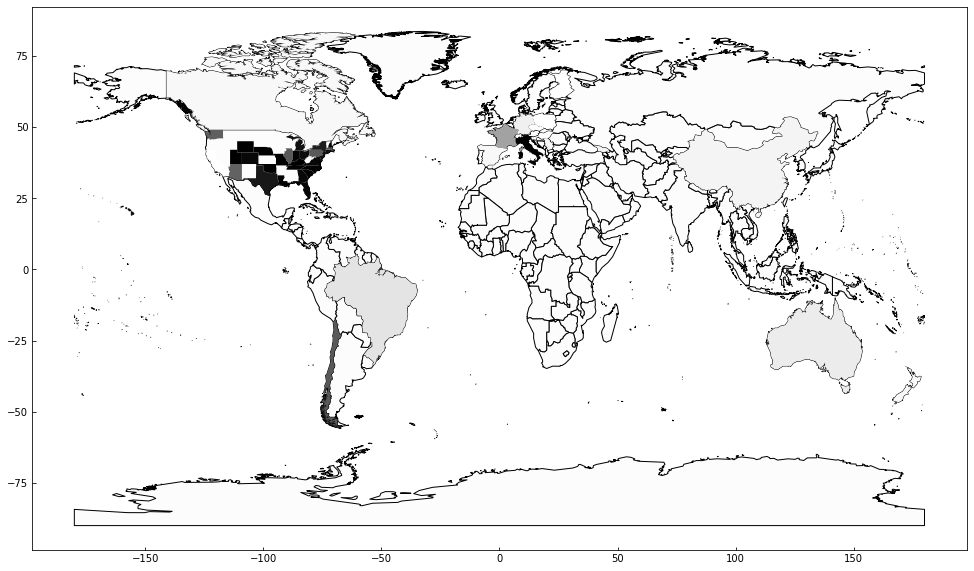

In [88]:
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredDrawingArea

fig, ax = pl.subplots(nrows=1, ncols=1,figsize=(20,10))
countriesshp.plot(color="#fcfcfc", edgecolor="k", ax=ax)
countriesshp.merge(dfgroup, right_index=True, left_on="NAME").plot(cmap="gray_r",
                                                        column="count", ax=ax)
statetsshp.merge(dfgroup, right_index=True, left_on="NAME").plot(cmap="gray", 
                                                    column="count", ax=ax)
colors = {"Transients and Variable Stars":"#44aa99", 'Solar System':"#332288", 
          'Strong Lensing':"#117733", 'DESC':"#cc6677", 
          'Galaxies':"#999933", 'AGN':"#882255", 
          'Stars, Milky Way, and Local Volume':"#88ccee", 
          'Statistics and Informatics':"#aa4499"}
pairslist = np.array(list(list(pairs.keys())))
pairsort = np.argsort([len(pairs[k][1]) 
                       for k in list(pairs.keys())])[::-1]
                    
l = 7
for i,k in enumerate(pairslist[pairsort]):
    print(k, len(pairs[k][1]))
    for j,p in enumerate(pairs[k][0]):
        #print(p, makeline(p[0], p[1])[0], 0.01 * pairs[k][1][j])
        if 1: #
        #try:
            #print(0.01 * pairs[k][1][j])
            #makeline(p[0], p[1]).plot(ax=ax, alpha=0.01 * pairs[k][1][j], 
            #                          color=colors[i])
            #print(makeline(p[0], p[1]))
            #pl.plot(makeline(p[0], p[1])[2], makeline(p[0], p[1])[1], alpha=0.01 * pairs[k][1][j], 
            #                          color=colors[i])
            alpha = 0.03 * pairs[k][1][j]
            #print(alpha)
            if k == "Stars, Milky Way, and Local Volume":
                alpha = alpha * 0.3
            alpha=max(0.02, min(1, alpha))
            plot_line(ax, makeline(p[0], p[1])[0], alpha=alpha, 
                                      color=colors[k])
            #print(makeline(p[0],p[1])[0])
            #makeline(p[0], p[1])[0]#.plot(ax=ax)
        #except:
        #    pass
    pl.plot(-180, -10*i, 'o', ms=10, color=colors[k])
    pl.text(-175, -10*i, k.replace("Stars, Milky Way, and Local Volume", 
                                  "SMWLV"), ha="left", va="center", fontsize=20)
    #break
ax.axis('off');
pl.savefig("SCmapWNet.png")


In [ ]:
#statetsshp.merge(dfgroup, right_index=True, left_on="NAME").head()
dfgroup2 = dfgroup.copy()
dfgroup2["state6"] = dfgroup2.index
dfgroup2 = dfgroup2.reset_index().set_index(["country"])["state6"].repeat(dfgroup['count']).reset_index()#

In [ ]:
dfgroup2

In [ ]:
statetsshp.head()

In [ ]:
def tr(x):
    return x.coords.xy[0][0]#, x.centers.coords.xy[1][0]
def tr1(x):
    return x.coords.xy[1][0]#, x.centers.coords.xy[1][0]
statetsshp["coords0"] = statetsshp["centers"].transform(tr)
statetsshp["coords1"] = statetsshp["centers"].transform(tr1)
    

In [ ]:
dfnow = statetsshp.merge(dfgroup2, right_on="country", left_on="NAME")[["coords0", "coords1"]]#.plot(cmap="gray", 
                                                    #column="count", ax=ax)


In [ ]:
import datashader as ds
import datashader.transfer_functions as tf
import dask.dataframe as dd
import numpy as np


In [ ]:

from functools import partial
from datashader.utils import export_image
from datashader.colors import colormap_select, Greys9
from IPython.core.display import HTML, display

export = partial(export_image, background = background, export_path="export")
cm = partial(colormap_select, reverse=(background!="black"))

display(HTML("<style>.container { width:100% !important; }</style>"))

world, USA

In [ ]:
!pip install  datashader

In [ ]:
world           = ((-180, 180), (-180,  180) )
USA           = ((-124.72,  -66.95), (23.55, 50.06))
background = "gray"
from datashader.utils import lnglat_to_meters 
import datashader as ds
x_range,y_range = [list(r) for r in USA]

plot_width  = int(900)
plot_height = int(plot_width*7.0/12)


In [ ]:
cvs = ds.Canvas(plot_width, plot_height, *USA)#*webm(*world))
agg = cvs.points(dfnow, 'coords0', 'coords1')
#dfnow[['coords0', 'coords1']]

In [ ]:
agg.data.flatten()[agg.data.flatten()>0]

In [ ]:
pl.hist(np.log(agg+1).data.flatten())

In [ ]:
color_key = {'w':'blue', 'b':'green', 'a':'red', 'h':'orange',  'o':'saddlebrown'}
from matplotlib.cm import hot
x_range,y_range=webm(np.array([-180,0]), np.array([-180,180]))
cvs = ds.Canvas(plot_width=plot_width, plot_height=plot_height, x_range=x_range, y_range=y_range)
agg = cvs.points(dfnow, 'coords0', 'coords1')
agg.data = agg.data+1
export(tf.shade(agg, color_key=color_key, how='eq_hist'), "tmp")
x_range,y_range 

In [ ]:
tf.shade(np.log(agg), cmap=plt.get_cmap('viridis'), how='linear')

In [ ]:
agg.data.sum()

In [ ]:
dfnow["coords0"]

In [ ]:
cvs.points(dfnow, "coords0","coords1", agg=None)